#### Predicting the category(inquiry, query, inform, request) using Machine Learning

#### Problem Definition
In this, we will building a machine learning model which is capable of predicting the category based on user's message

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn model
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer

# model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [135]:
data = pd.read_csv("dataset1.csv")

data.head()

,Query,Category
0,why there is no power supply in my street,1
1,In our are we dont have power,1
2,we dont have power in our area,1
3,we dont have electricity In our area,1
4,in our area we dont have electricity,1


In [136]:
data.isna().sum()

Query       0
Category    0
dtype: int64

In [137]:
data.shape

(110, 2)

In [138]:
data["Category"].unique()

array([1, 2, 3, 4], dtype=int64)

In [139]:
data.head()

,Query,Category
0,why there is no power supply in my street,1
1,In our are we dont have power,1
2,we dont have power in our area,1
3,we dont have electricity In our area,1
4,in our area we dont have electricity,1


In [140]:
X = data["Query"]
y = data["Category"]

In [141]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [142]:
X_train.shape, X_test.shape

((88,), (22,))

In [143]:
vect = CountVectorizer(ngram_range=(2,2))

X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

In [144]:
print(X_train[:3])

  (0, 303)	1
  (0, 150)	1
  (0, 204)	1
  (0, 244)	1
  (0, 97)	1
  (0, 1)	1
  (0, 0)	1
  (0, 116)	1
  (0, 70)	1
  (0, 274)	1
  (0, 277)	1
  (1, 204)	1
  (1, 246)	1
  (1, 136)	1
  (1, 48)	1
  (1, 60)	1
  (1, 120)	1
  (1, 167)	1
  (2, 204)	1
  (2, 304)	1
  (2, 164)	1


In [145]:
print(X_test[:3])

  (0, 82)	1
  (1, 19)	1
  (1, 58)	1
  (1, 108)	1
  (1, 190)	1
  (1, 204)	1
  (2, 30)	1
  (2, 58)	1
  (2, 104)	1
  (2, 126)	1
  (2, 190)	1
  (2, 300)	1


In [146]:
mnb = MultinomialNB(alpha =0.2)

mnb.fit(X_train,y_train)

y_pred = mnb.predict(X_test)
print(y_pred)

[3 1 1 4 3 3 1 1 4 1 3 3 1 4 1 3 2 3 4 2 1 2]


Confusion matrix


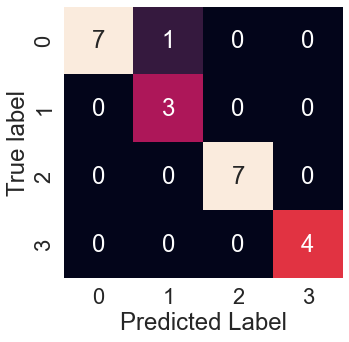

In [147]:
print("Confusion matrix")
sns.set(font_scale=2)

fig, ax = plt.subplots(figsize=(5, 5))
ax = sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, cbar=False)

plt.xlabel("Predicted Label")
plt.ylabel("True label")

In [148]:
print(f"Accuracy: {round(accuracy_score(y_test, y_pred)*100, 2)}%")
print()
print(f"Micro Precision: {round(precision_score(y_test, y_pred, average='micro')*100, 2)}%")
print(f"Micro Recall: {round(recall_score(y_test, y_pred, average='micro')*100, 2)}%")
print(f"Micro F1-score: {round(f1_score(y_test, y_pred, average='micro')*100, 2)}%")
print()
print(f"Macro Precision: {round(precision_score(y_test, y_pred, average='macro')*100, 2)}%")
print(f"Macro Recall: {round(recall_score(y_test, y_pred, average='macro')*100, 2)}%")
print(f"Macro F1-score: {round(f1_score(y_test, y_pred, average='macro')*100, 2)}%")
print()
print(f"Weighted Precision: {round(precision_score(y_test, y_pred, average='weighted')*100, 2)}%")
print(f"Weighted Recall: {round(recall_score(y_test, y_pred, average='weighted')*100, 2)}%")
print(f"Weighted F1-score: {round(f1_score(y_test, y_pred, average='weighted')*100, 2)}%")
print()
print("Classification Report", classification_report(y_test, y_pred), sep="\n")

Accuracy: 95.45%

Micro Precision: 95.45%
Micro Recall: 95.45%
Micro F1-score: 95.45%

Macro Precision: 96.88%
Macro Recall: 93.75%
Macro F1-score: 94.76%

Weighted Precision: 96.02%
Weighted Recall: 95.45%
Weighted F1-score: 95.28%

Classification Report
              precision    recall  f1-score   support

           1       0.88      1.00      0.93         7
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4

    accuracy                           0.95        22
   macro avg       0.97      0.94      0.95        22
weighted avg       0.96      0.95      0.95        22



In [149]:
import joblib

joblib.dump(mnb, "model")
joblib.dump(vect, "vectorizer")